<a href="https://colab.research.google.com/github/KarolinaA09/Karolina-Acosta/blob/main/Ejercicio_S10_Reconstrucci%C3%B3n_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio semana 10 - Reconstrucción 3D**


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import glob
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

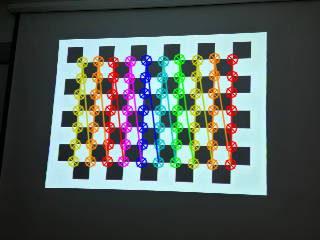

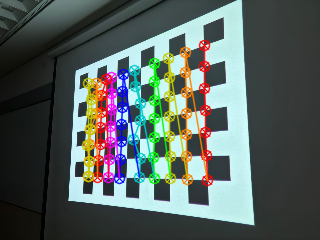

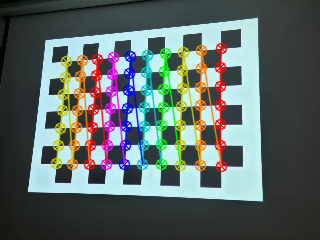

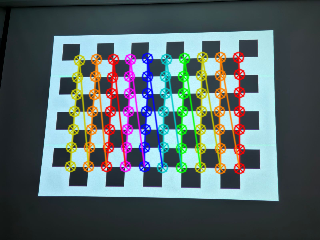

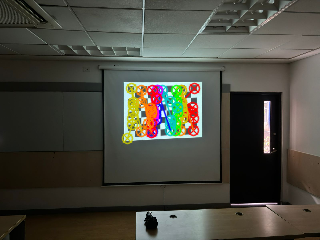

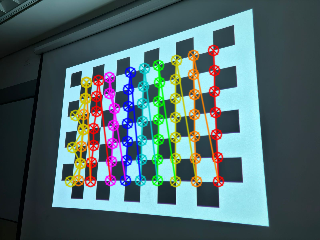

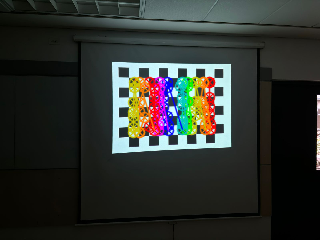

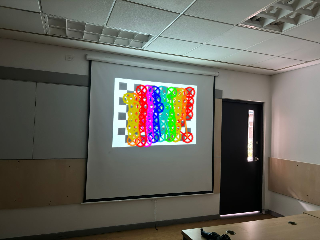

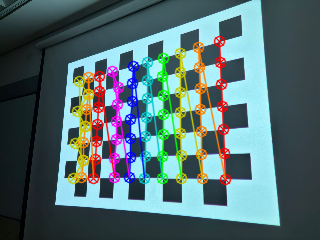

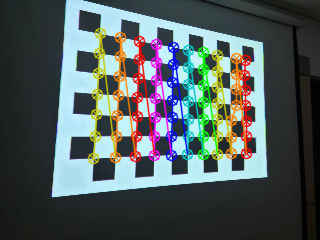

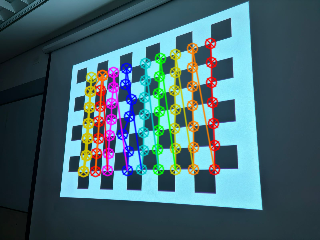

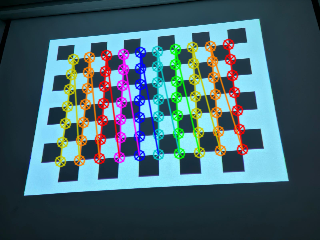

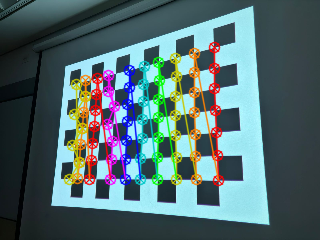

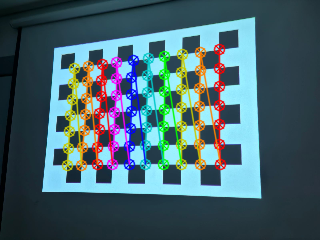

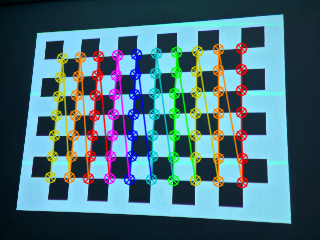

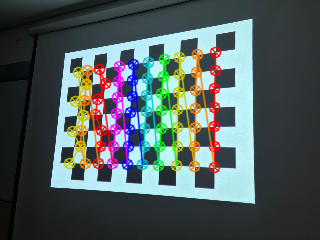

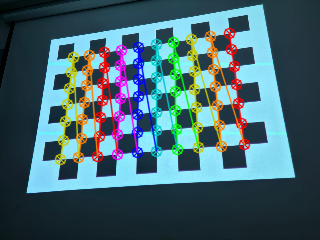

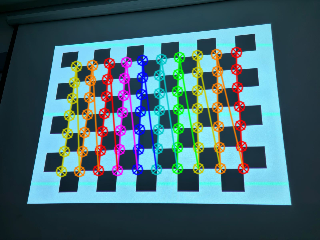

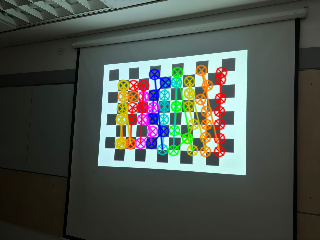

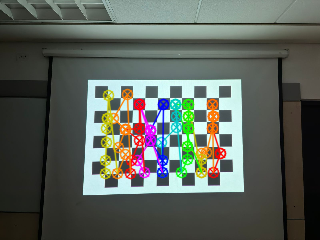

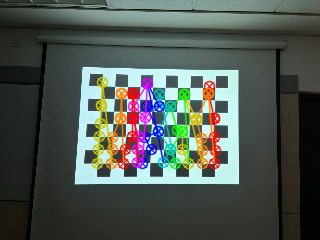

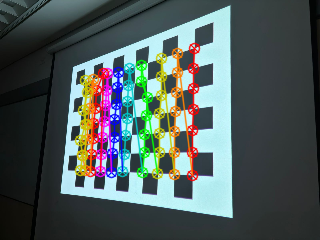

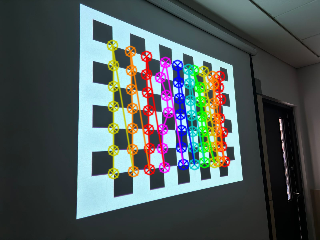

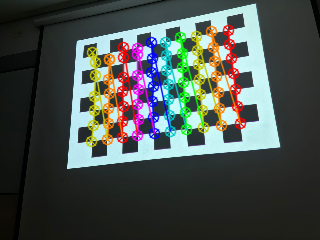

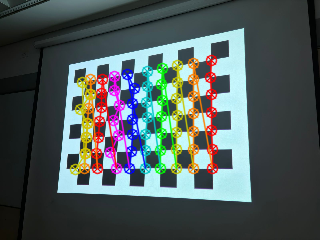

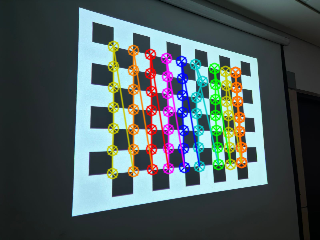

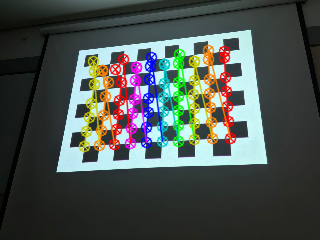

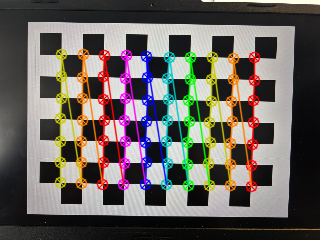

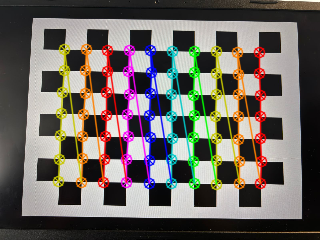

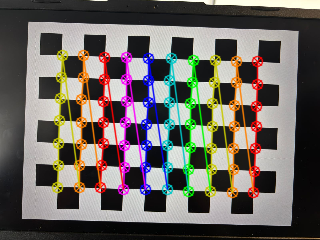

In [ ]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*10,3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /s10/*.jpg')

for fname in images:
 img = cv.imread(fname)
 img = cv.resize(img, (0,0), fx=0.2, fy=0.2)
 gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

 # Find the chess board corners
 ret, corners = cv.findChessboardCorners(gray, (7,10), None)

 # If found, add object points, image points (after refining them)
 if ret == True:
  objpoints.append(objp)
  corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
  imgpoints.append(corners2)

 # Draw and display the corners
 cv.drawChessboardCorners(img, (7,10), corners2, ret)
 cv2_imshow(img)
 cv.waitKey(500)


In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(mtx)
print(dist)

[[2.43725240e+03 0.00000000e+00 1.22967144e+02]
 [0.00000000e+00 1.20243978e+02 1.38049758e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-9.60837868e+02  4.93151411e+04 -7.02303850e+01 -1.04126885e+01
  -1.00402587e+04]]


In [ ]:
# Definir las constantes de la cámara
FX = 5.72527909e+03
FY = 5.18669153e+02
CX = 1.51185656e+02
CY = 7.39210408e+01

# Lista para almacenar las coordenadas de los puntos de cada par de imágenes
coordenadas_puntos = []

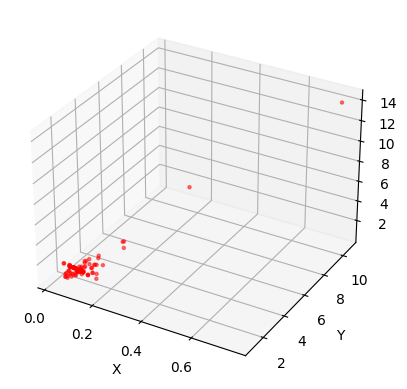

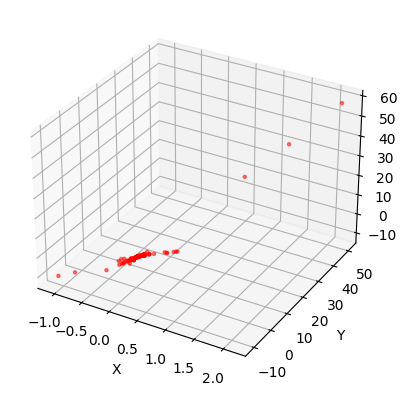

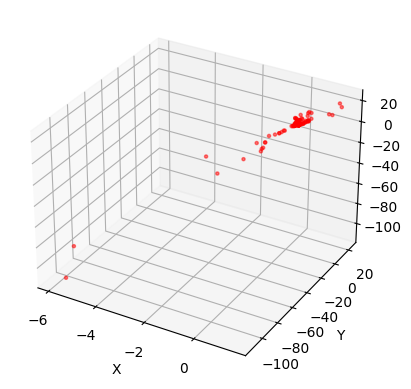

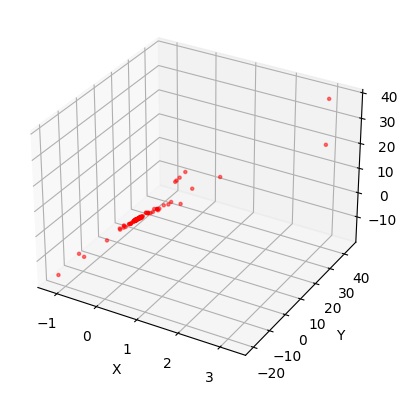

In [ ]:
# Hacer el proceso 4 veces (para 8 imágenes)
for i in range(1, 5):
    img1 = cv2.imread(f'/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /Cubo/IMG-{2*i-1}.jpg')
    img2 = cv2.imread(f'/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /Cubo/IMG-{2*i}.jpg')

    K = np.array([[FX, 0, CX], [0, FY, CY], [0, 0, 1]])  # Camera intrinsic matrix

    # Feature detection and matching
    orb = cv2.ORB_create()
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Essential matrix
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)

    _, R, t, _ = cv2.recoverPose(E, pts1, pts2, K, mask=mask)

    # Triangulate points
    # Build the projection matrices for the two cameras
    P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
    P2 = np.hstack((R, t))

    # Convert the projection matrices to the camera coordinate system
    P1 = K @ P1
    P2 = K @ P2

    # Triangulate the 3D points
    points_4D = cv2.triangulatePoints(P1, P2, pts1, pts2)
    points_3D = points_4D / points_4D[3]  # Convert from homogeneous to Cartesian coordinates
    points_3D = points_3D[:3, :].T

    # Agregar las coordenadas de los puntos a la lista
    coordenadas_puntos.append(points_3D)

    # Visualizar
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D points
    ax.scatter(points_3D[:, 0], points_3D[:, 1], points_3D[:, 2], marker='o', s=5, c='r', alpha=0.5)

    # Configure the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [ ]:
# Imprimir la lista de coordenadas de los puntos para cada par de imágenes
print(coordenadas_puntos)

[array([[ 0.10832322,  1.3068622 ,  1.5191531 ],
       [ 0.12708144,  1.5170906 ,  1.0606315 ],
       [ 0.07214216,  1.4589893 ,  1.4372274 ],
       [ 0.10907218,  1.3096598 ,  1.5231775 ],
       [ 0.06489444,  1.3659396 ,  1.5278631 ],
       [ 0.05697349,  1.3961159 ,  1.5225265 ],
       [ 0.08378804,  1.439296  ,  1.4062228 ],
       [ 0.06086725,  1.2089275 ,  1.2759904 ],
       [ 0.08378429,  1.4399003 ,  1.4068437 ],
       [ 0.06131937,  1.3708961 ,  1.5230336 ],
       [ 0.08351461,  1.4386433 ,  1.4023592 ],
       [ 0.7574734 , 10.686089  , 14.002452  ],
       [ 0.15934362,  1.6067594 ,  1.3179213 ],
       [ 0.10323185,  1.351787  ,  1.338995  ],
       [ 0.19152291,  3.2432353 ,  3.1625326 ],
       [ 0.05817392,  1.3976525 ,  1.5149133 ],
       [ 0.06381493,  1.3661522 ,  1.5235044 ],
       [ 0.05109131,  1.1199133 ,  0.6902709 ],
       [ 0.10768004,  1.3102901 ,  1.5235219 ],
       [ 0.02572116,  1.5313268 ,  1.4266659 ],
       [ 0.09671449,  2.2638354 ,  1.67

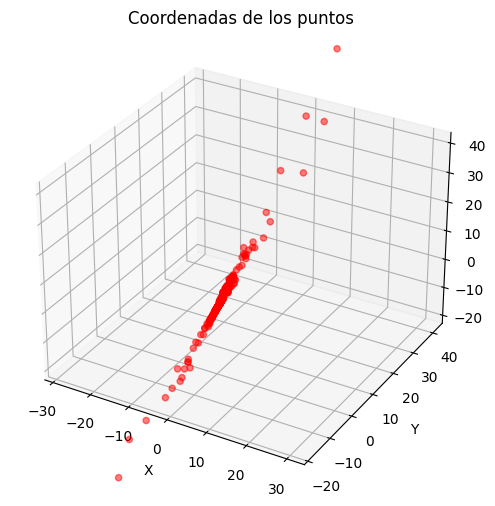

In [ ]:
# Visualizar todos los puntos juntos
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Iterar sobre cada conjunto de puntos
for puntos in coordenadas_puntos:
    # Graficar los puntos
    ax.scatter(puntos[:, 0], puntos[:, 1], puntos[:, 2], marker='o', s=20, c='r', alpha=0.5)

# Configurar etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Coordenadas de los puntos')

# Configurar la relación de aspecto para que los ejes tengan la misma escala
max_range = np.array([np.max(puntos[:,0])-np.min(puntos[:,0]), np.max(puntos[:,1])-np.min(puntos[:,1]), np.max(puntos[:,2])-np.min(puntos[:,2])]).max() / 2.0
mid_x = (np.max(puntos[:,0]) + np.min(puntos[:,0])) * 0.5
mid_y = (np.max(puntos[:,1]) + np.min(puntos[:,1])) * 0.5
mid_z = (np.max(puntos[:,2]) + np.min(puntos[:,2])) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Mostrar la gráfica
plt.show()